# Logistic Regression

### Importing Libraries

In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### Importing the data

In [2]:
data = pd.read_csv('data_cleaned_logistic.csv')
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


### Segregating variables: Independent and Dependent Variables

In [3]:
#seperating independent and dependent variables
x = data.drop(['Survived'], axis=1)
y = data['Survived']
x.shape, y.shape

((891, 24), (891,))

### Splitting the data into train set and the test set

In [4]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

### Normalising using *min_max_scaler*

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [6]:
cols = train_x.columns
cols

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [7]:
train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)
train_x_scaled.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.371701,0.024350,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.334004,0.016908,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.396833,0.015127,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.786378,0.152164,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.334004,0.412821,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
test_x_scaled = scaler.transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=cols)
test_x_scaled.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.396833,0.143462,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.359135,0.129995,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.367921,0.014110,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.346569,0.025374,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.371701,0.054164,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [10]:
train_y.value_counts()

0    405
1    263
Name: Survived, dtype: int64

In [16]:
train_y.value_counts()/len(train_y)

0    0.606287
1    0.393713
Name: Survived, dtype: float64

for imbalanced dataset use below code

In [11]:
#from sklearn.utils import class_weight

In [12]:
#class_weights = class_weight.compute_class_weight('balanced',np.unique(train_y),train_y)
#class_weights

array([0.82469136, 1.26996198])

### Implementing Logistic Regression

In [10]:
#importing Logistic Regression and metric F1-score
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import f1_score

In [11]:
# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

C:\Users\arabn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Making predictions using *predict* function

In [12]:
# Predicting over the Train
train_predict = logreg.predict(train_x)
train_predict

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,

In [13]:
# Calculating f1-score
k = f1_score(train_predict, train_y)
print('Training f1_score', k )

Training f1_score 0.7485148514851485


In [14]:
# Predicting over the Test Set and f1-score
test_predict = logreg.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test f1_score    ', k )

Test f1_score     0.7500000000000001


### Making predictions using *predict_proba* function

In [39]:
# Predicting over the Train
train_predict = logreg.predict_proba(train_x)
train_predict

array([[0.50532352, 0.49467648],
       [0.90358574, 0.09641426],
       [0.87905543, 0.12094457],
       ...,
       [0.23180944, 0.76819056],
       [0.31396125, 0.68603875],
       [0.04488942, 0.95511058]])

In [40]:
train_preds = train_predict[:,1]
train_preds

array([0.49467648, 0.09641426, 0.12094457, 0.78269598, 0.63158916,
       0.11959955, 0.82765248, 0.76837127, 0.52316396, 0.08819516,
       0.10903783, 0.08834922, 0.12710621, 0.09929281, 0.60742296,
       0.08735926, 0.30854426, 0.1232522 , 0.07440991, 0.28061905,
       0.10585234, 0.21134137, 0.07037276, 0.5975955 , 0.09323385,
       0.52618668, 0.08819849, 0.55834155, 0.59353525, 0.13131476,
       0.8143307 , 0.08838525, 0.58424961, 0.12972092, 0.01941745,
       0.59135499, 0.2108636 , 0.13152646, 0.06123523, 0.27460263,
       0.84284742, 0.39026577, 0.20569057, 0.71795552, 0.48472499,
       0.94248275, 0.35733848, 0.23520172, 0.17378939, 0.89340126,
       0.13552772, 0.63959882, 0.23012318, 0.60033748, 0.3403429 ,
       0.64464184, 0.77324401, 0.28159549, 0.11224526, 0.30456332,
       0.59461433, 0.28159549, 0.1303339 , 0.45512465, 0.10073264,
       0.97659398, 0.12001879, 0.08834922, 0.85823995, 0.67783363,
       0.9327145 , 0.75638005, 0.89304446, 0.44658025, 0.83485

In [41]:
for i in range(0, len(train_preds)):
  if(train_preds[i]>0.55):
    train_preds[i] = 1
  else:
    train_preds[i] = 0
  

In [42]:
# Calculating f1-score
k = f1_score(train_preds, train_y)
print('Training f1_score', k )

Training f1_score 0.7428571428571429


# Confusion matrix

In [43]:
from sklearn.metrics import confusion_matrix
cf= confusion_matrix(test_y, test_predict)
print(cf)

[[128  16]
 [ 22  57]]


In [44]:
from sklearn.metrics import classification_report as rep
print(rep( test_y , test_predict ))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       144
           1       0.78      0.72      0.75        79

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.83      0.83      0.83       223



# Parameters of Logistic Regression

In [45]:
# printing the coefficients
logreg.coef_

array([[-0.03483332,  0.00290016,  0.99952697,  0.09486378, -1.05437914,
         1.17493832, -1.13492671,  0.87606772,  1.08449066,  0.48118324,
        -0.58818097, -0.80578026, -0.43078863, -0.57698013,  0.23067538,
         0.68993583, -0.08309919,  0.31876763, -0.59641792, -0.1944619 ,
        -0.32538821,  0.16857502,  0.1512254 , -0.27978881]])

### Plotting the coefficients

Text(0.5, 1.0, 'Coefficient plot')

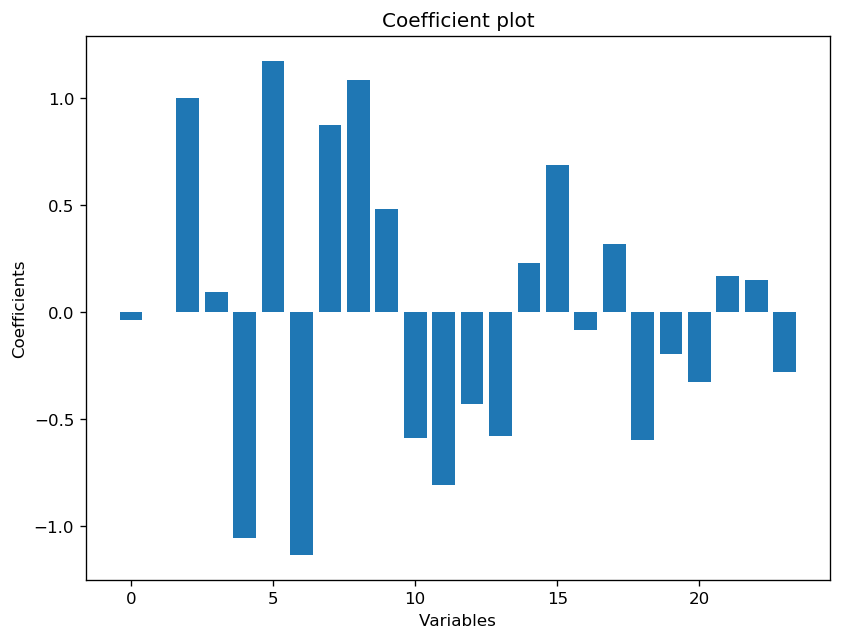

In [46]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
c = logreg.coef_.reshape(-1)
plt.bar( x, c )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [50]:
Coefficients = pd.DataFrame({
    'Variable'    : train_x.columns,
    'coefficient' : abs(c)
})
Coefficients[Coefficients.coefficient > 0.3]

,Variable,coefficient
2,Pclass_1,0.999527
4,Pclass_3,1.054379
5,Sex_female,1.174938
6,Sex_male,1.134927
7,SibSp_0,0.876068
8,SibSp_1,1.084491
9,SibSp_2,0.481183
10,SibSp_3,0.588181
11,SibSp_4,0.805780
12,SibSp_5,0.430789


In [51]:
#selecting variables with high coefficient
sig_var = Coefficients[Coefficients.coefficient > 0.3]

In [52]:
subset = data[sig_var['Variable'].values]
subset.head()

,Pclass_1,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_3,Parch_4,Parch_6
0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0


In [53]:
# Using train test split function
train_x,test_x,train_y,test_y = train_test_split(subset, y, random_state = 56)

### Implementing Logistic Regression

In [54]:
# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

C:\Users\arabn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Making predictions using *predict* function

In [55]:
# Predicting over the Train
train_predict = logreg.predict(train_x)
k = f1_score(train_predict, train_y)
print('Training f1_score', k )

Training f1_score 0.7025948103792415


Text(0.5, 1.0, 'Coefficient plot')

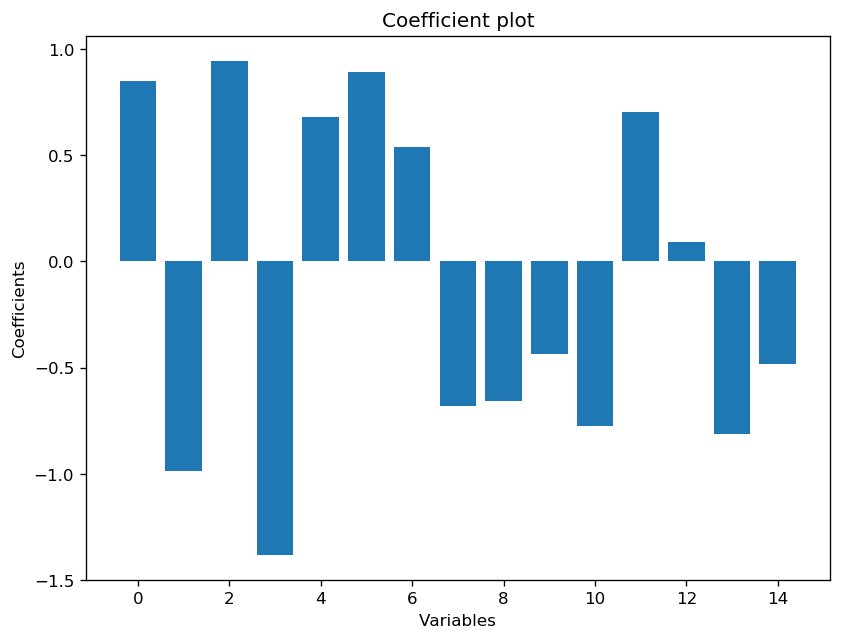

In [56]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
c = logreg.coef_.reshape(-1)
plt.bar( x, c )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')